# DD Hypothesis Testing: Loss Curves

Visualization of the long-training experiment to test whether deep networks
can eventually fit high-rank functions with extended training.

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to data directory (relative to notebooks folder)
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), "data")

# Load results
with open(os.path.join(DATA_DIR, "DD_R32_D48_results.json"), "r") as f:
    results = json.load(f)

print(f"Configuration:")
print(f"  Rank: {results['rank']}")
print(f"  Depth: {results['depth']}")
print(f"  Epochs: {results['epochs']}")
print(f"  Baseline loss (zero output): {results['baseline_loss']:.2f}")
print(f"  Best final loss: {results['best_final_loss']:.6f}")
print(f"  Best LR: {results['best_lr']}")
print(f"  Total time: {results['total_time_seconds'] / 60:.1f} minutes")

Configuration:
  Rank: 32
  Depth: 48
  Epochs: 100000
  Baseline loss (zero output): 60.64
  Best final loss: 0.001105
  Best LR: 0.0002
  Total time: 32.1 minutes


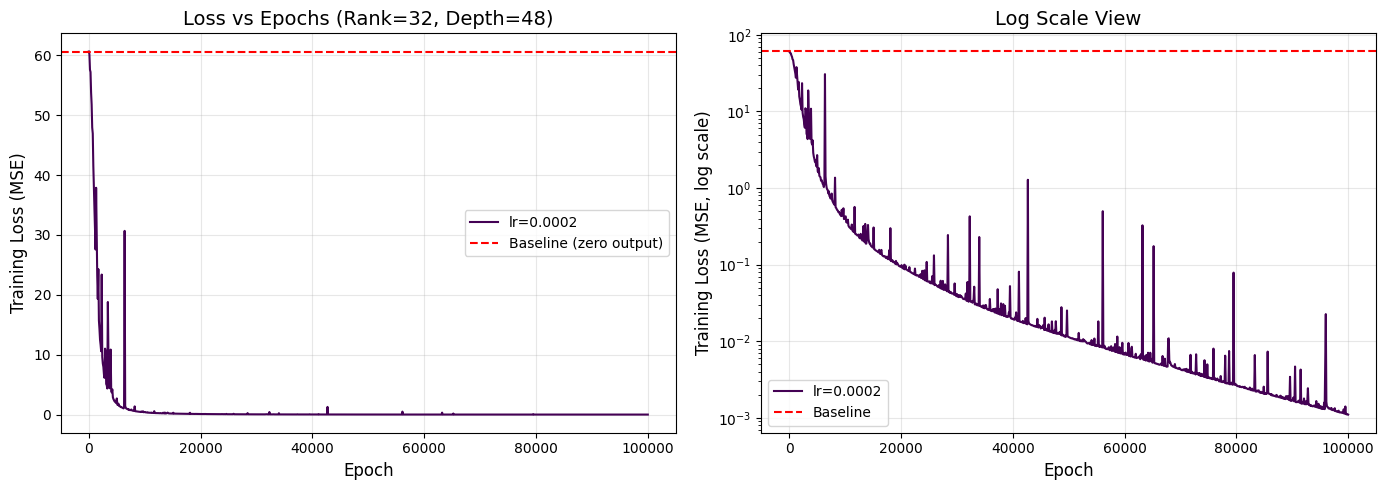

Saved: DD_R32_D48_loss_curves.png


In [ ]:
# Plot loss curves for all learning rates
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.viridis(np.linspace(0, 0.9, len(results["experiments"])))

# Linear scale
ax = axes[0]
for i, exp in enumerate(results["experiments"]):
    epochs = [h[0] for h in exp["loss_history"]]
    losses = [h[1] for h in exp["loss_history"]]
    ax.plot(epochs, losses, color=colors[i], label=f"lr={exp['lr']}", linewidth=1.5)

ax.axhline(
    y=results["baseline_loss"],
    color="red",
    linestyle="--",
    label="Baseline (zero output)",
)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Loss (MSE)", fontsize=12)
ax.set_title(
    f"Loss vs Epochs (Rank={results['rank']}, Depth={results['depth']})", fontsize=14
)
ax.legend()
ax.grid(True, alpha=0.3)

# Log scale
ax = axes[1]
for i, exp in enumerate(results["experiments"]):
    epochs = [h[0] for h in exp["loss_history"]]
    losses = [h[1] for h in exp["loss_history"]]
    ax.plot(epochs, losses, color=colors[i], label=f"lr={exp['lr']}", linewidth=1.5)

ax.axhline(y=results["baseline_loss"], color="red", linestyle="--", label="Baseline")
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Loss (MSE, log scale)", fontsize=12)
ax.set_title("Log Scale View", fontsize=14)
ax.set_yscale("log")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("DD_R32_D48_loss_curves.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: DD_R32_D48_loss_curves.png")

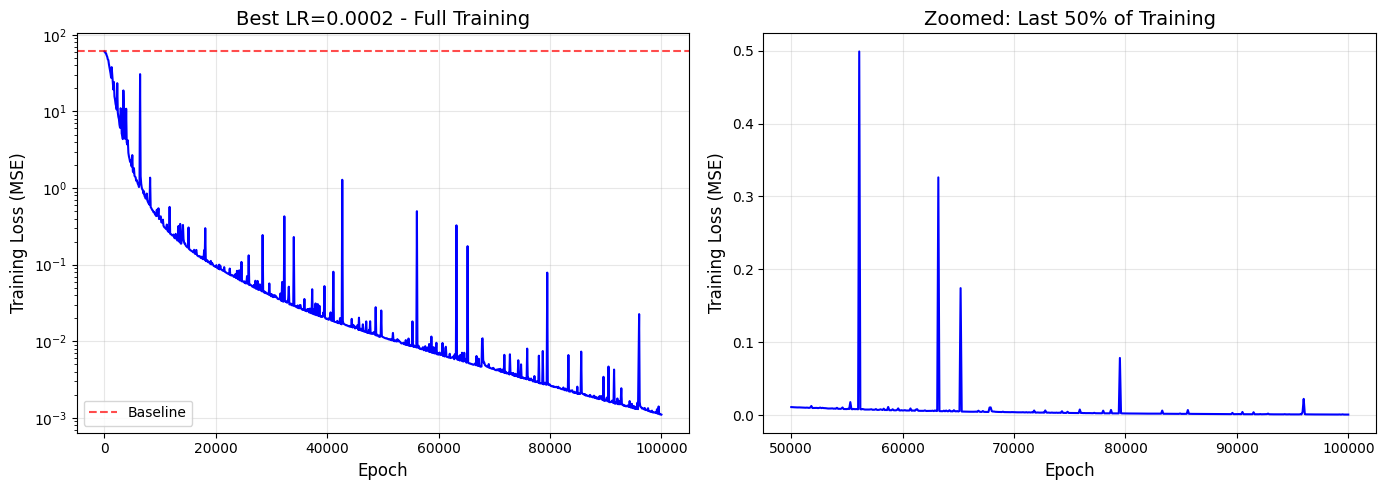

Saved: DD_R32_D48_best_lr_detail.png


In [ ]:
# Detailed view of best learning rate
best_exp = [e for e in results["experiments"] if e["lr"] == results["best_lr"]][0]
epochs = [h[0] for h in best_exp["loss_history"]]
losses = [h[1] for h in best_exp["loss_history"]]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Full view
ax = axes[0]
ax.plot(epochs, losses, "b-", linewidth=1.5)
ax.axhline(
    y=results["baseline_loss"], color="red", linestyle="--", alpha=0.7, label="Baseline"
)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Loss (MSE)", fontsize=12)
ax.set_title(f"Best LR={results['best_lr']} - Full Training", fontsize=14)
ax.set_yscale("log")
ax.legend()
ax.grid(True, alpha=0.3)

# Zoomed view (last 50%)
ax = axes[1]
mid = len(epochs) // 2
ax.plot(epochs[mid:], losses[mid:], "b-", linewidth=1.5)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Loss (MSE)", fontsize=12)
ax.set_title("Zoomed: Last 50% of Training", fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("DD_R32_D48_best_lr_detail.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: DD_R32_D48_best_lr_detail.png")

In [ ]:
# Summary statistics
print("=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"\nTask: Fit Y = X @ W where W has rank {results['rank']}")
print(f"Network: {results['depth']}-layer ReLU network, dim={results['dim']}")
print(f"\nResults:")
print(f"  Baseline loss (network outputs zero): {results['baseline_loss']:.2f}")
print(f"  Best final loss achieved: {results['best_final_loss']:.6f}")
print(
    f"  Improvement factor: {results['baseline_loss'] / results['best_final_loss']:.1f}x"
)
print(f"\nConclusion:")
if results["best_final_loss"] < 0.01:
    print("  SUCCESS - Network converged to near-zero loss!")
elif results["best_final_loss"] < 1.0:
    print("  PARTIAL - Network learned significantly but didn't fully converge")
else:
    print("  LIMITED - Network struggled to fit the high-rank function")

SUMMARY

Task: Fit Y = X @ W where W has rank 32
Network: 48-layer ReLU network, dim=64

Results:
  Baseline loss (network outputs zero): 60.64
  Best final loss achieved: 0.001105
  Improvement factor: 54874.7x

Conclusion:
  SUCCESS - Network converged to near-zero loss!
